In [181]:
import numpy as np
import sys 
import re
from re import search
import os
import pandas as pd
import math

filee = open('3hl5.pdb','r')
file_out = open('out.pdb','w')
lines = filee.readlines()
atoms = []
for l in lines:
    if l.startswith("ATOM"):
        atoms.append(l)

catoms = []
for ca in atoms:
    if "CA" in ca:
        catoms.append(ca)
        file_out.writelines(ca)    

In [182]:
catomss = pd.read_csv('out.pdb',header=None,sep='\s+',engine='python')

In [184]:
x=[]
y=[]
z=[]
x = catomss[6].tolist()
y = catomss[7].tolist()
z = catomss[8].tolist()

#calpha=np.array()
calpha=np.zeros([len(z),len(z)])
#print(calpha)

for i in range(len(z)-1):
    for j in range(len(y)-1):
        #print("atoms %d-%d" % (i,j))
        if(i==j):
            dist = 0
            calpha[i][j]=dist
        
        else:
            d = math.sqrt(abs((((x[i]-x[j])**2) + ((y[i]-y[j])**2)+ ((z[i]-z[j])**2))))
            dist = d
            calpha[i][j]=dist
            
final = pd.DataFrame(calpha)
final          

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,0.000000,3.833591,6.816240,8.834136,9.382329,10.132201,13.519611,15.330358,18.506839,17.187221,...,16.754485,16.320065,13.394450,15.575682,18.511085,17.136670,16.354436,19.622338,21.765934,0.0
1,3.833591,0.000000,3.834742,5.477653,7.227398,8.565843,12.021968,13.180444,16.728002,16.078898,...,18.878963,18.641928,16.186090,18.478320,21.469233,20.364200,19.845544,22.989710,25.354623,0.0
2,6.816240,3.834742,0.000000,3.820776,6.347960,9.197792,11.870238,11.908880,15.637226,15.067602,...,18.335090,18.212387,16.455315,18.934922,21.802675,21.103893,21.109186,24.033527,26.779423,0.0
3,8.834136,5.477653,3.820776,0.000000,3.821072,6.494435,8.894357,8.708091,12.532880,12.653198,...,21.615542,21.068774,19.351056,22.133366,24.769437,23.695502,23.879568,27.031352,29.573191,0.0
4,9.382329,7.227398,6.347960,3.821072,0.000000,3.810266,5.558709,6.058171,9.580958,9.134993,...,21.616907,20.403255,18.771759,21.967905,24.151795,22.636054,23.208688,26.563338,28.887835,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,17.136670,20.364200,21.103893,23.695502,22.636054,23.750558,25.350381,27.028963,28.831448,25.592961,...,8.740551,6.545669,5.263017,5.584350,3.814180,0.000000,3.806285,5.627226,7.757702,0.0
90,16.354436,19.845544,21.109186,23.879568,23.208688,24.105017,26.188514,28.108768,30.195585,27.204907,...,9.871291,8.925066,6.415603,5.246512,5.360851,3.806285,0.000000,3.808747,5.762656,0.0
91,19.622338,22.989710,24.033527,27.031352,26.563338,27.681898,29.755826,31.494775,33.624796,30.589597,...,10.066604,9.931701,8.577201,5.903999,4.910848,5.627226,3.808747,0.000000,3.837373,0.0
92,21.765934,25.354623,26.779423,29.573191,28.887835,29.589266,31.647661,33.714391,35.650429,32.555640,...,13.844485,13.293777,11.758725,9.580881,8.261156,7.757702,5.762656,3.837373,0.000000,0.0


In [185]:
import matplotlib.pyplot as plt

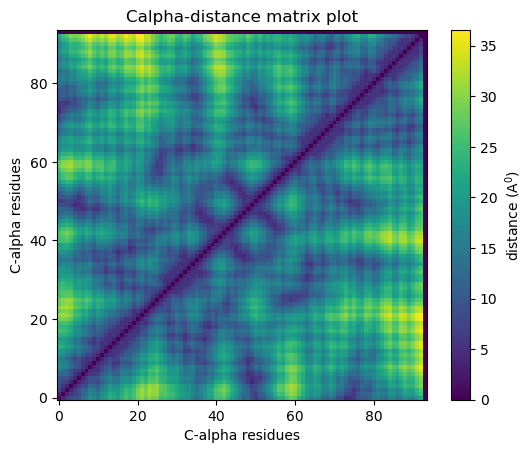

In [210]:
plt.imshow(final,origin='lower',interpolation='Nearest')
#plot.set_xticks(range(90),5)
plt.xlabel('C-alpha residues')
plt.ylabel('C-alpha residues')
plt.title('Calpha-distance matrix plot')
cbar = plt.colorbar()
cbar.set_label('distance (A$^{0}$)')